In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Social_Network_ads.csv')
data1 = data
y = data['Purchased']
data1.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
x = data[['Gender', 'Age', 'EstimatedSalary' ]]
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(data[['Gender']])
gen = enc.transform(data[['Gender']])
x[['g_f','g_m']] = gen
x = x.drop(columns='Gender')
x
# new_df = pd.concat([x,gen],axis=1)
# x = new_df.drop(columns='Gender')
# print(gen)

<ipython-input-4-ba14e27dc179>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['g_f','g_m']] = gen


,Age,EstimatedSalary,g_f,g_m
0,19,19000,0.0,1.0
1,35,20000,0.0,1.0
2,26,43000,1.0,0.0
3,27,57000,1.0,0.0
4,19,76000,0.0,1.0
...,...,...,...,...
395,46,41000,1.0,0.0
396,51,23000,0.0,1.0
397,50,20000,1.0,0.0
398,36,33000,0.0,1.0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [ ]:
x_train,x_test,y_train, y_test


(     Age  EstimatedSalary  g_f  g_m
 150   26            15000  1.0  0.0
 314   39            79000  1.0  0.0
 234   38           112000  1.0  0.0
 287   48           138000  1.0  0.0
 299   46           117000  0.0  1.0
 ..   ...              ...  ...  ...
 300   58            38000  1.0  0.0
 110   39            71000  1.0  0.0
 335   36            54000  1.0  0.0
 207   52           114000  1.0  0.0
 318   45            32000  0.0  1.0
 
 [300 rows x 4 columns],
      Age  EstimatedSalary  g_f  g_m
 255   52            90000  1.0  0.0
 28    29            43000  0.0  1.0
 240   42           149000  0.0  1.0
 355   60            34000  0.0  1.0
 206   55           130000  1.0  0.0
 ..   ...              ...  ...  ...
 382   44           139000  1.0  0.0
 11    26            52000  1.0  0.0
 56    23            48000  1.0  0.0
 260   35            77000  1.0  0.0
 162   37            33000  1.0  0.0
 
 [100 rows x 4 columns],
 150    0
 314    0
 234    0
 287    1
 299    1
       .

In [ ]:
nb_c = GaussianNB()
nb_c.fit(x_train,y_train)

GaussianNB()

In [ ]:

nb_c.score(x_train,y_train)

0.9033333333333333

In [ ]:
nb_c.score(x_test,y_test)

0.88

In [ ]:
def gen_enc(gender):
  g = enc.transform([[gender]])
  return g[0,0], g[0,1]

In [ ]:
def take_input(model):
  age = int(input('Enter your age: '))
  salary = float(input('Enter your salary: '))
  gender = input('Enter your gender: ')
  x1,x2 = gen_enc(gender)
  if model == nb_c2:
    val = sc.transform([[age,salary,x1,x2]])
    return f'Prediction: {model.predict(val)} with probability {model.predict_proba(val)} scaled'
  return f'Prediction: {model.predict([[age,salary,x1,x2]])} with probability {model.predict_proba([[age,salary,x1,x2]])} non scaled'

In [ ]:
# @title Using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
model_1 = GaussianNB()


new_x = data1[['EstimatedSalary','Age','Gender']]
new_y = data1['Purchased']
new_x['Gender'] = le.fit_transform(new_x['Gender'])
new_x_train, new_x_test, new_y_train, new_y_test  = train_test_split(new_x,new_y , test_size = 0.25 )

sc1 = StandardScaler()
new_x_train = sc1.fit_transform(new_x_train)
new_x_test = sc1.transform(new_x_test)

model_1.fit(new_x_train,new_y_train)
print(model_1.score(new_x_train,new_y_train))
print(model_1.score(new_x_test,new_y_test))


age = int(input('Enter your age: '))
salary = float(input('Enter your salary: '))
gender = input('Enter your gender: ')
gen = le.transform([gender])
gen = gen[0]
scaled_input = sc1.transform([[salary,age,gen]])
print(scaled_input)
if model_1.predict(scaled_input) == 1 :
  print('Purchased')
  ans = model_1.predict_proba(scaled_input)
  print(ans.argmax(), ans.max(), ' value: ' , ans)
else :
  print('Not Purchased')




<ipython-input-14-2074d3b5ce25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_x['Gender'] = le.fit_transform(new_x['Gender'])


0.8966666666666666
0.89
Enter your age: 56
Enter your salary: 56000
Enter your gender: Female
[[-0.37105276  1.81461955 -0.94801592]]
Purchased
1 0.9328584767864049  value:  [[0.06714152 0.93285848]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_x

,EstimatedSalary,Age,Gender
0,19000,19,1
1,20000,35,1
2,43000,26,0
3,57000,27,0
4,76000,19,1
...,...,...,...
395,41000,46,0
396,23000,51,1
397,20000,50,0
398,33000,36,1


In [ ]:
from  sklearn.linear_model import LogisticRegression

In [ ]:
log_m = LogisticRegression()
log_m.fit(x_train,y_train)


LogisticRegression()

In [ ]:
log_m.score(x_train,y_train)

0.6166666666666667

In [ ]:
log_m.score(x_test,y_test)

0.72

In [ ]:
#Scaler
log_m.predict_proba([[25,60000,0,1]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.51537499, 0.48462501]])

In [ ]:
x_train_scale = sc.transform(x_train)
x_test_scale = sc.transform(x_test)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

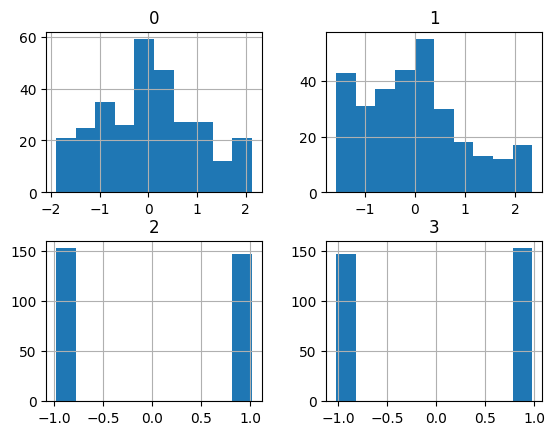

In [ ]:
pd.DataFrame(x_train_scale).hist()

In [ ]:
nb_c2 = GaussianNB()

In [ ]:
nb_c2.fit(x_train_scale,y_train)


GaussianNB()

In [ ]:
nb_c2.score(x_train_scale,y_train)

0.9033333333333333

In [ ]:
nb_c2.score(x_test_scale,y_test)


0.88

In [ ]:
take_input(nb_c)

Enter your age: 56
Enter your salary: 56000
Enter your gender: Male


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


'Prediction: [1] with probability [[0.11263972 0.88736028]] non scaled'

In [ ]:
take_input(nb_c2)

Enter your age: 30
Enter your salary: 56000
Enter your gender: Malr


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Prediction: [0] with probability [[0.95922267 0.04077733]] scaled'

In [6]:
# @title Spam Email Classifier
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer()


In [7]:
email = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/email.csv')
email = email.iloc[:-1,:]
print(email.head())
print(email['Message'].loc[0])


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [8]:
all_words = []
for x in email['Message']:
  for word in x.split(' '):
    all_words.append(word)

print(f'Total words in email: {len(all_words)}')
print(f'Unique word count in email: {len(set(all_words))}')


Total words in email: 87265
Unique word count in email: 15688


In [55]:
count_v = CountVectorizer()
from sklearn.feature_extraction.text import HashingVectorizer
hash_v = HashingVectorizer()


In [54]:
data_h = hash_v.fit_transform(email['Message'])
# print(data_h)
data_h.shape


(5572, 1048576)

In [58]:
texts = ['Hello my name is sirjan ','hi i dont know']
hash_i = HashingVectorizer()
data_i = hash_i.fit_transform(texts)
data_i.shape

(2, 1048576)

In [23]:
data_c  = count_v.fit_transform(email['Message'])
data_c.toarray()[0].shape


(8709,)

In [24]:
np.random.choice(count_v.get_feature_names_out(),  1000)

array(['dark', 'hyde', 'tomorro', 'christmas', 'elaborate', 'bday', 'ga',
       'hopeso', 'tamilnadu', 'prolly', 'tech', 'confused', 'travelled',
       'kodthini', 'exorcist', 'called', 'alertfrom', 'wishin', 'ghost',
       'visitor', 'konw', 'inlude', 'learned', 'genes', 'worry', 'nickey',
       'chest', 'favorite', 'known', 'shakespeare', 'hvae', 'suppose',
       'semiobscure', 'diff', 'btw', 'bothering', 'suffering', 'talking',
       'appointments', 'mobilesvary', 'cricketer', 'youdoing', 'lies',
       'queen', 'masteriastering', 'corect', 'errors', 'mallika',
       'fighting', 'poem', 'tmorow', 'dining', 'trial', 'xxx', 'prakasam',
       'propose', 'luvd', '04', 'malarky', '0845', 'she',
       'pobox12n146tf150p', 'kalaachutaarama', 'thesedays', '2channel',
       'atten', 'ummma', 'jada', 'travelling', 'joining', 'surely',
       'breadstick', 'ratio', 'egbon', 'toxic', 'cheating', 'matra',
       'idew', 'tactful', 'jiayin', 'lux', 'bridal', 'peeps', 'mp3',
       'boot

In [25]:
from  sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
y = le.fit_transform(email['Category'])

In [28]:
print(le.transform(['spam']))
print(le.transform(['ham']))
le.inverse_transform([0,1])

[1]
[0]


array(['ham', 'spam'], dtype=object)

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [30]:
bnb = BernoulliNB()
mnb = MultinomialNB()

In [31]:
bnb.fit(data_c,y)
mnb.fit(data_c,y)

MultinomialNB()

In [33]:
mnb.fit(,y)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
def check_email(model):
  email = input('Enter the email to be checked')
  email = count_v.transform([email])
  return model.predict(email) , model.predict_proba(email)

In [ ]:
predict,predict_proba = check_email(bnb)
predict,predict_proba
le.inverse_transform(predict)

Enter the email to be checkedDear Winner,  We are pleased to inform you that you have been selected as the grand prize winner of our international lottery. Your email address was randomly selected from a global database.  To claim your prize, please reply with your full name, address, and phone number.  Congratulations once again, and we look forward to your swift response!


array(['spam'], dtype=object)

In [ ]:
predictm, predictm_proba = check_email(mnb)
predictm, predictm_proba
le.inverse_transform(predict)

Enter the email to be checkedDear Winner,  We are pleased to inform you that you have been selected as the grand prize winner of our international lottery. Your email address was randomly selected from a global database.  To claim your prize, please reply with your full name, address, and phone number.  Congratulations once again, and we look forward to your swift response!


array(['spam'], dtype=object)